**Aluno:**

* Marcos Madruga (mcmap@cesar.school)

# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

In [2]:
torch.manual_seed(11111)

## Dataset e dataloader

### Definição do tamanho do minibatch

In [3]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [4]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [5]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [6]:
model = torch.nn.Linear(28*28, 10)

In [7]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.0254,  0.1208,  1.6365, -0.3145,  0.9721, -1.0166, -1.3794,  0.0402,
          0.7109,  0.3460]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [8]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [9]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [10]:
print('Final loss:', loss.data)

Final loss: tensor(0.1767)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

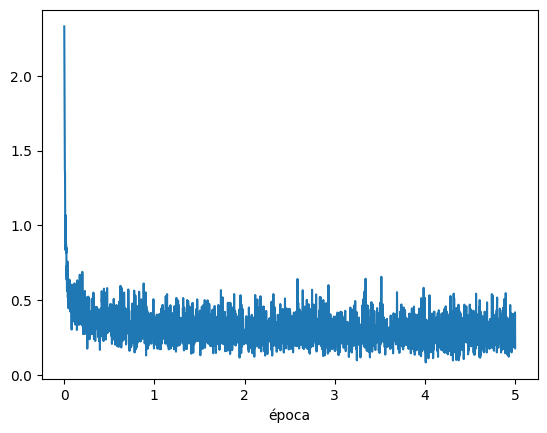

In [11]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

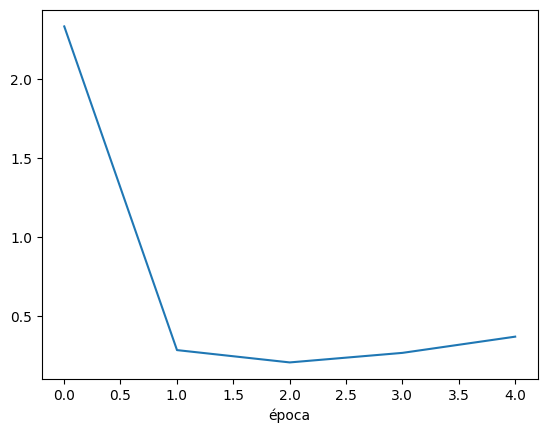

In [12]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
2. Em uma época, quantos mini-batches existem?
3. Qual é a definição de época?

####Respostas


1.   100 amostras
2.   600 mini-batches
3.   Uma época corresponde a uma etapa do processo de treinamento onde todas as amostras são utilizadas para fazer predições. Nessa etapa/época, que pode ou não ser subdividida em mini-batches, os pesos são atualizados.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [13]:
# Resposta exercício 1

torch.manual_seed(11111)

epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        #losses.append(loss.data)
        # Convert loss.data to a Python scalar using .item()
        losses.append(loss.item())

        # Perda do mini-batch
        print(f'Época: {i+1}/{n_epochs}, batch: {k+1}')

Época: 1/5, batch: 1
Época: 1/5, batch: 2
Época: 1/5, batch: 3
Época: 1/5, batch: 4
Época: 1/5, batch: 5
Época: 1/5, batch: 6
Época: 1/5, batch: 7
Época: 1/5, batch: 8
Época: 1/5, batch: 9
Época: 1/5, batch: 10
Época: 1/5, batch: 11
Época: 1/5, batch: 12
Época: 1/5, batch: 13
Época: 1/5, batch: 14
Época: 1/5, batch: 15
Época: 1/5, batch: 16
Época: 1/5, batch: 17
Época: 1/5, batch: 18
Época: 1/5, batch: 19
Época: 1/5, batch: 20
Época: 1/5, batch: 21
Época: 1/5, batch: 22
Época: 1/5, batch: 23
Época: 1/5, batch: 24
Época: 1/5, batch: 25
Época: 1/5, batch: 26
Época: 1/5, batch: 27
Época: 1/5, batch: 28
Época: 1/5, batch: 29
Época: 1/5, batch: 30
Época: 1/5, batch: 31
Época: 1/5, batch: 32
Época: 1/5, batch: 33
Época: 1/5, batch: 34
Época: 1/5, batch: 35
Época: 1/5, batch: 36
Época: 1/5, batch: 37
Época: 1/5, batch: 38
Época: 1/5, batch: 39
Época: 1/5, batch: 40
Época: 1/5, batch: 41
Época: 1/5, batch: 42
Época: 1/5, batch: 43
Época: 1/5, batch: 44
Época: 1/5, batch: 45
Época: 1/5, batch: 

In [14]:
# Resposta 2
# Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o
# treinamento, e compare no gráfico abaixo a queda da perda para cada
# tamanho de minibatch

# Vou refazer todo o treinamento do modelo dentro de um laço, mas o ideal seria
# criar uma função e usar o laço apenas para chamar a função

batch_size = [100, 500, 1000]
n_variacoes = len(batch_size)
n_batches_train = []
epochs = []
losses = []


for n in range(n_variacoes):

  torch.manual_seed(11111)

  # Variações no tamanho dos mini-batchs
  epochs_mini = []
  losses_mini = []

  # Recriar o modelo
  # model = torch.nn.Linear(28*28, 10)
  # ou apenas resetar os pesos
  model.reset_parameters()  # reinicializa os pesos da camada Linear

  #recriar o otimizador
  optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

  # Recriar o Dataloader
  loader_train = DataLoader(dataset_train, batch_size=batch_size[n], shuffle=True)
  n_batches_train.append( len(loader_train) )

  total_trained_samples = 0
  for i in range(n_epochs):
      for k,(x_train, y_train) in enumerate(loader_train):
          # Transforma a entrada para uma dimensão
          inputs = Variable(x_train.view(-1, 28 * 28))
          # predict da rede
          outputs = model(inputs)

          # calcula a perda
          loss = criterion(outputs, Variable(y_train))

          # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_trained_samples += x_train.size(0)
          epochs_mini.append(total_trained_samples / total_samples)
          #losses_mini.append(loss.data)
          # Convert loss.data to a Python scalar using .item()
          losses_mini.append(loss.item())

      #epochs_mini.append(i)
      #losses_mini.append(loss.data)

  epochs.append(epochs_mini)
  losses.append(losses_mini)

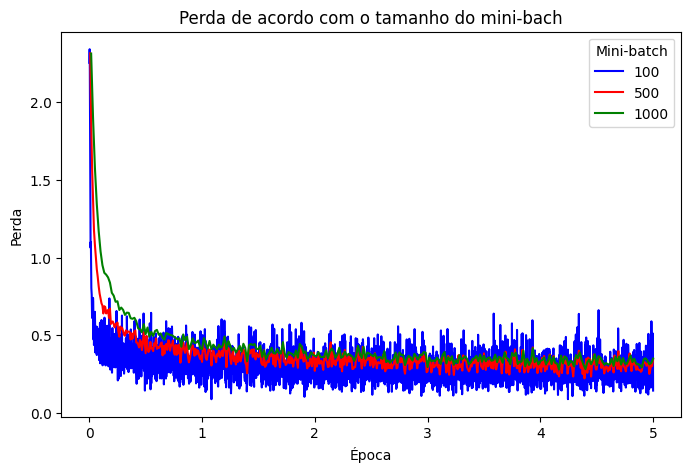

In [15]:
import seaborn as sns

# Criar gráfico
plt.figure(figsize=(8, 5))

sns.lineplot(x=epochs[0], y=losses[0], color='blue', label=f'{batch_size[0]}')
sns.lineplot(x=epochs[1], y=losses[1], color='red', label=f'{batch_size[1]}')
sns.lineplot(x=epochs[2], y=losses[2], color='green', label=f'{batch_size[2]}')
# Adicionar rótulos e legenda
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda de acordo com o tamanho do mini-bach')
plt.legend(title='Mini-batch')
plt.grid(False)
plt.show()

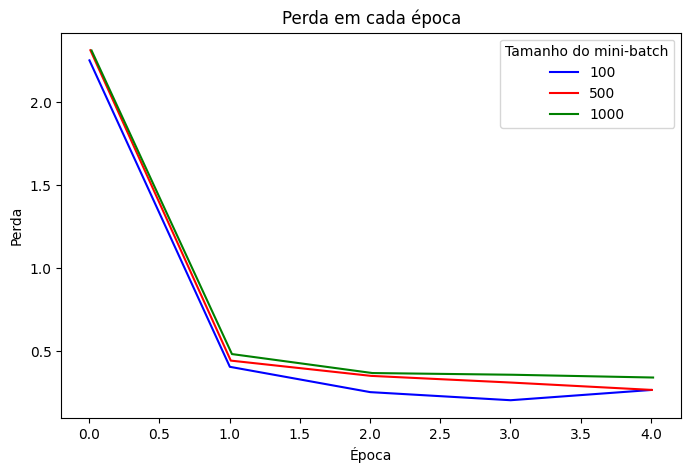

In [16]:
import seaborn as sns

# Criar gráfico
plt.figure(figsize=(8, 5))

sns.lineplot(x=epochs[0][:5 * n_batches_train[0] +1:n_batches_train[0]], y=losses[0][:5 * n_batches_train[0] +1:n_batches_train[0]], color='blue', label=f'{batch_size[0]}')
sns.lineplot(x=epochs[1][:5 * n_batches_train[1] +1:n_batches_train[1]], y=losses[1][:5 * n_batches_train[1] +1:n_batches_train[1]], color='red', label=f'{batch_size[1]}')
sns.lineplot(x=epochs[2][:5 * n_batches_train[2] +1:n_batches_train[2]], y=losses[2][:5 * n_batches_train[2] +1:n_batches_train[2]], color='green', label=f'{batch_size[2]}')
# Adicionar rótulos e legenda
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda em cada época')
plt.legend(title='Tamanho do mini-batch')
plt.grid(False)
plt.show()

####Resposta 2
Podemos observar que mini-batchs com um menor número de amostras (ex: 100) apresentam uma perda menor. Embora, na última época, as perdas onde os mini-batchs tinham 100 e 500 amostras apresentaram praticamente a mesma perda.

## Conclusões sobre os experimentos deste notebook
